# 東森新聞雲爬蟲練習
## 練習從東森新聞雲網站中，爬取新聞摘要及詳細內容。
## 學習利用Selenium模擬人為操作，更新動態網頁後爬取新聞內容。

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 以財經新聞為例，先連結到財經新聞網頁，複製其URL。

In [2]:
ETtoday_url = "https://www.ettoday.net/news/focus/%E8%B2%A1%E7%B6%93/"  #財經新聞

### 用Selenium打開一個瀏覽器，連結到網站。然後模擬下拉網頁的動作，讓網頁完成更新，再處理後續動作。

<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><head><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=3&amp;r=" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=" type="text/javascript"></script><script async="" src="//wurfl.io/wurfl.js"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl.js"></script><script async="" src="https://dcs.eimi.com.tw/api/dcs-client.js" type="text/javascript"></script><script async="" src="https://onead.onevision.com.tw/external.php?category=finance&amp;cookie=true&amp;uid=1000019&amp;ip=&amp;
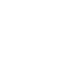
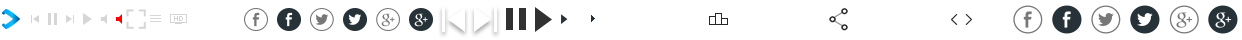
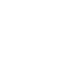
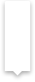
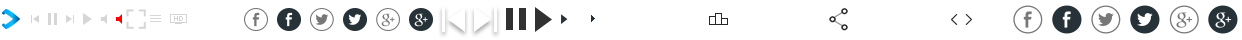
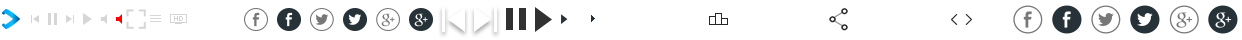
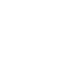
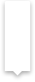
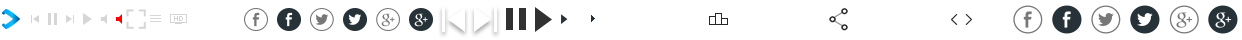

In [5]:
driver = webdriver.Chrome(executable_path='/Users/cafemato/chromedriver')
driver.get(ETtoday_url)  # 打開瀏覽器並連到東森新聞雲網頁

SCROLL_PAUSE_TIME = 1

#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
def scroll_down():
    """A method for scrolling the page."""

    # Get scroll height.
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:

        # Scroll down to the bottom.
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load the page.
        time.sleep(2)

        # Calculate new scroll height and compare with last scroll height.
        new_height = driver.execute_script("return document.body.scrollHeight")

        if new_height == last_height:

            break

        last_height = new_height
        
scroll_down()
soup = BeautifulSoup(driver.page_source)

### 到這裡網頁已經更新完畢，所有的新聞都已經出現在網頁上。接下來做爬取收集新聞的動作。

In [6]:
#
# 這裡先建立一個函數，其功能是連到外部連結，並爬取新聞內容。
#
def getNewsDetailContent(link_url):
    resp = requests.get(link_url)
    resp.encoding = 'utf-8'
    #print(resp.text)

    soup = BeautifulSoup(resp.text, 'lxml')
    news_content = soup.find("div", attrs={'class':'story'}).find_all("p")
    for p in news_content:
        
        #.string屬性說明：
        #(1) 若當前tag節點底下沒有其他tag子節點，會直接抓取內容(返回"NavigableString")
        #(2) 若當前tag節點底下只有唯一的一個tag子節點，也會直接抓取tag子節點的內容(返回"NavigableString")
        #(3) 但若當前tag節點底下還有很多個tag子節點，.string就無法判斷，(返回"None")
        
        if ((p.string) is not None):
            print(p.string)


### 解析HTML並萃取新聞摘要，若有外部的連結，再連到外部連結並把詳細新聞內容抓取下來。

In [9]:
# 爬取網頁內容，解析後萃取新聞摘要
html = driver.page_source
soup = BeautifulSoup(html, "lxml")
all_news = soup.find("div", attrs={'class':'block block_1 infinite_scroll'})

news_block = all_news.find_all('div', attrs={'class':'piece clearfix'})

for i, news_item in enumerate(news_block):
    print("----------------------------------------------------------------------")
    news_body = news_item.find('h3')
    print("\n[%d] %s\n" % (i, news_body.a.string))
    
    # 
    # 連到外部連結，擷取詳細新聞內容
    #
    externalLink = "https://www.ettoday.net" + news_body.a["href"]
    getNewsDetailContent(externalLink)


----------------------------------------------------------------------

[0] 合庫銀海外拓點在下一城　金管會核准申設休士頓分行

▲金管會今天同意合庫銀向美國申請設立休士頓分行，而第一銀行先前也提出申請，目前向當地主管機關申設中。（圖／記者紀佳妘攝）
記者紀佳妘／台北報導
金管會今（24）日同意合作金庫商業銀行向美國申請設立休士頓分行，銀行局表示，目前國銀在美國分支機構共有23家分行、3家子行及2家代表人辦事處。
金管會銀行局指出，合庫銀目前已設有西雅圖、洛杉磯、馬尼拉、香港、蘇州、雪梨、金邊、天津、福州、紐約、長沙、墨爾本等12家分行，比利時台灣聯合銀行1家子行及北京、仰光2家代表人辦事處。
銀行局表示，合庫銀為布建更完整美國營業據點，就近服務當地台商客群，因此規劃於德州設立休士頓分行，以強化海外業務觸角及服務品質，擴大海外營運基礎，持續為該行建構全球金融服務網絡。
根據銀行局統計，目前本國銀行在美國分支機構共有23家分行、3家子行及2家代表人辦事處，國銀已有第一商業銀行經過金管會核准向當地主管機關申設德州休士頓分行，目前也向當地主管機關申設中。
----------------------------------------------------------------------

[1] 郵差工作減輕！小額郵包繳稅用「嗶」嘛Ａ通　明年1月3日起可用台灣Pay繳

▲財政部關務署。（圖／記者吳靜君攝）
記者吳靜君／台北報導
財政部關務署今（24）日表示，為了便利民眾繳納進口郵包稅款，明（2020）年1月3日起，與郵局合作推出「行動支付掃碼繳稅」的服務，民眾只要1分鐘，就可以用行動裝置繳完小額郵包進口稅款。
關務署表示，民眾收到小額郵包進口稅款繳納時，過去都是由郵差幫忙代收，但是為未來民眾就可以使用台灣Pay或者郵保鑣App掃描繳納證上的行動條碼（QR-Code），免輸入銷帳編號、繳款金額等稅費資料，就可以選擇用金融卡支付，民眾只要輸入卡片密碼、圖形驗證碼並且確認繳款資訊後，就可以完成繳款。
關務署解釋，小額郵包完稅價格在新台幣2000元以下不用繳稅費、但是超過5000美元（約新台幣15萬2100元）就要報關和需要報關單，所以小額郵包完稅價格在2000元到15多萬元之間，都可以用台灣Pa

▲國光生技董事長詹啟賢。（圖／記者姚惠茹攝）
記者姚惠茹／台北報導
國光生技（4142）今（24）日宣布啟動「全方位生技廠區」願景計畫，即將興建新的細胞培養廠、破傷風疫苗廠、增擴支援系統及倉儲、品管實驗室及辦公室等，並已向董事會提出報告及討論，預計明年1月正式向董事會提案，待通過後立即開始執行，預計將在三年內逐步完成。
國光生技表示，「全方位生技廠區」願景計畫主軸是以「建立更全面的先進疫苗生產設施與能力」為主，以配合公司新開發疫苗產品的生產，並為將來擴大國際市場所增加的需求奠定基礎。
國光生技指出，目前數種開發中的疫苗產品，包括與轉投資公司安特羅生技合作的腸病毒71型疫苗、準備進入臨床階段的日本腦炎疫苗，以及其他計畫開發的疫苗，未來都會使用細胞培養製程及設施生產，因此公司將會展開細胞培養廠的建廠，以完善自有的全製程生產製造能力。
國光生技說明，過去國光生技曾經是國內破傷風疫苗的唯一生產供應廠，但舊廠2014年已停止生產，目前以歐洲進口的破傷風疫苗供應國內需求，因此考慮國內未來長期需求以及評估未來外銷的商機，國光計畫重新建置符合PIC/S GMP標準的破傷風疫苗廠。
國光生技補充，目前國光生技已經在建置第二條無菌針劑充填線，完成後無菌充填產能將增加數倍，且根據已經與合作生產客戶間簽署的新合約，兩三年後生產產品數量將倍數增加，並為配合增加的原料及成品倉儲需求，公司計畫增建1000坪的倉儲空間，並擴增廢水處理廠，同時也要擴充品管實驗室規模及辦公室空間，因此廠區包括新建後勤支援棟及配套措施，達到全方位成長發展。
國光生技強調，待執行完成新的建廠計畫後，除了用於生產流感疫苗的雞胚胎蛋生產廠及大規模的無菌針劑充填設施外，將再增加最新的細胞培養廠及破傷風疫苗廠，對於未來的多樣化的疫苗及其他蛋白質藥品生產也會擁有全面性的現代化生產製造設施，目標成為亞太疫苗生產領導廠。
----------------------------------------------------------------------

[12] 媲美Apple蘋果直營門市　全台首座「能源健身房」落腳新北

▲電幻1號所首創體感互動的「能源健身房」，讓民眾邊玩邊運動感受電力能源，現場還有全台首座結合VR虛擬實境的六軸機器人。（圖／台電提供）
記者林淑慧／台北報導
運動健身風氣盛行，台電公司今（24）日舉行「電

▲經濟部長沈榮津表示，未來將透過投資台灣三大方案與產創條例投資抵減，持續推動以智慧機械驅動智慧製造，以帶動產業升級。（圖／記者屠惠剛攝）
記者林淑慧／台北報導
經濟部長沈榮津今（24）日表示，在推動中小企業數位化、標竿企業智慧化政策下，智慧機械產業連續二年產值已突破兆元，未來將透過投資台灣三大方案與產創條例投資抵減，持續推動以智慧機械驅動智慧製造，以帶動產業升級。
台灣機械工業同業公會今天舉行台灣機械雲成果發表會，以發表公板機械雲，呼應去年白皮書的中期目標，經濟部長沈榮津受邀出席並發表致詞。
中美貿易戰持續延燒，牽動全球供應鏈重組，沈榮津指出，台灣將被定位為高階產品製造中心，像是附加價值率高或有信賴特性的產品，台商已選擇回台生產製造，而台商回台投資行動方案當中，也要求廠商須具備如雲端、大數據、物聯網、人工智慧之智慧技術元素或智慧化功能，因此新建置的產線可大幅提升生產效率。
他並指出，台灣機械工業同業公會去年針對機械產業需求端，發布智慧機械產業白皮書，將邁入新台幣兆元產業的台灣機械業訂出短中長期目標，短期希望新舊機台聯網，加強可視化、蒐集稼動率及異常監控等資訊，中期希望加速發展感測器與機械雲，長期希望工研院等相關單位協助機械業打造工業等級的感測器。
沈榮津表示，智慧製造是台灣製造業未來的核心競爭力，透過發展智慧製造與智慧機械，協助製造產業邁向智慧化，是未來機械業重要課題；要邁入智慧製造，應先做好智慧機械。
----------------------------------------------------------------------

[23] 日前提前解約120人下月再減200人　英業達：因應客戶需求調整人力

▲英業達經營團隊。（圖／資料照）
記者周康玉／台北報導
代工廠英業達（2356）日前提前解約派遣員工120名，今日有網友指出，明年1月5日要再砍200人。對此，英業達表達，這次情況跟日前同樣，主要源於中美貿易戰變化，因應對客戶需求的產能，人力上做調節。
網友在爆怨公社po文指出，英業達大溪廠內日夜班加總人員還有近200位派遣員工，但每個人都在人心煌煌，因為1月5日前，要再砍掉近200位台籍派遣員工。
網友表示，公司在12月9日聘僱了68個菲籍夜班勞工後，日班也進了100位菲籍勞工，若之後再砍掉200名派遣員後，將有9成都是外籍勞工，痛批「要玩也不

▲東森購物發佈年度10大熱銷商品排行榜。（圖／東森購物提供，以下同）
記者洪菱鞠／台北報導
東森購物公布2019年「10大熱銷商品排行榜」，賣出最多件數冠軍是「KOPIKO集團高機能咖啡組」，共售出68,060組、2,720,000包咖啡；從營業額來看，「東森自然美水漾超彈潤口服安瓶14天神效組」則是熱銷第1，共賣出675,000瓶、疊起來有106座101高，創造1.89億元驚人成績，前10名當中，美容保健類佔了7項，可見消費者對美及健康的重視，另3項是「英國KANGOL 80周年限定後背包」、「王品集團 Tasty西堤牛排餐」券和「王品集團 陶板屋餐券」，累積銷售全年共創造了近77億營業額，佔整體業績近4成以上。
▲東森自然美水漾超彈潤口服安瓶14天神效組。
10大熱銷商品排行榜榜首由「東森自然美水漾超彈潤口服安瓶14天神效組」拿下，第2名則是「日本味王2019視界專科HA葉黃素」，共計賣出51,531組、7,729,650顆葉黃素，由於上班族群整天都在受藍光影響，因此對視力保健日趨受重視。第3名「關速樂靈活關鍵自如口含錠」，共計賣出25,967組、4,674,060顆口含錠；第4名「吳姍儒代言一家人益生菌」，共計售出25,889組、2,588,900包益生菌；第5名是「英國KANGOL 80周年限定後背包」，共計賣出38,759組、116,277個袋鼠包。
第6名是今年雙11造成瘋搶癱網的「王品集團 Tasty西堤牛排餐券」，共計賣出104,030張餐券；第7名「WEDAR 日本高酵孅盈黑酵素」，共計售出34,566組、6,221,880顆黑酵素；第8名也是今年雙11的發燒搶購商品「王品集團 陶板屋餐券」，共計售出96,000張餐券；第9名「KOPIKO集團高機能咖啡組」，共售出68,060件、2,720,000包咖啡，賣出的咖啡包數，足以供應全台北市262萬市民，每人人手一杯咖啡。第10名「FORTE美纎萃12型標靶代謝果膠」，共計售出18,129組、761,418包果膠。10項中有7項為美容保健商品，餐券更都是雙11和雙12等大促季節，造成網友狂刷的口碑商品。
▲KOPIKO集團高機能咖啡組。
除了創造營業額外，以銷售件數最多來看，第1名「KOPIKO集團高機能咖啡組」，共售出68,060件、2,720,000包咖啡，可見咖啡族已成台灣消費族群大宗；第2名「

圖、文／富比士提供
「惠友新捷境」位於林口特定區，文化三路、林口A9站，一次到位的設計理念，讓成家可以變成很簡單的事，加上精緻大坪數規劃，不同於同地區其他建案，舒適入住35～47坪，讓您不將就小空間犧牲生活品質，過得比別人更寬闊自由。
惠友新捷境　6大機能一次到位
集結居住優勢5大生活機能，「惠友新捷境」一次包辦，交通步行5分鐘即達機場捷運A9林口站，車行4分鐘即上國道1號，快速連結台北都會生活、桃園機場，快意縱橫世界。
採買購物商圈選擇多樣，「惠友新捷境」周邊有9家購物中心、2家百貨商店。車行3分鐘即達三井OUTLET，超過200多家國內外品牌入駐。周邊生活機能發展逐漸成熟，滿足全方位生活所需，食衣住行通通有。
▲三井OUTLET僅三分鐘車行距離，食衣住行一次到位。
入住「惠友新捷境」讓您安居樂業，周邊產業到位，車行5分鐘即達每年產值高達5000億元華亞科技園區，多達一百餘家知名廠商雲集，一地難求。周圍並同時匯聚多種產業聚落，科技園區、媒體園區與醫療園區等，增加大量就業機會，人流帶動金流，發展潛力無窮。
健康、運動放鬆身心都到位！「惠友新捷境」緊鄰千坪公園預定地，綠意串聯龜山運動公園，在繁忙的日子裡也能森呼吸。另外，車行6分鐘即可達林口長庚醫院院區，各項科別俱足，服務團隊達9千人以上，豐沛醫療資源，守護全家人的健康。
更不必擔心交屋後的裝潢預算限制，「惠友新捷境」附8種居家生活場景，只要選擇想要的裝潢風格，即可輕鬆入住！
▲惠友新捷境緊鄰千坪公園預定地與龜山運動公園，綠意隨時擁抱。
▲成屋附八種風格裝潢任選，省去裝修煩惱。
惠友品牌慢工細活 嚴選建材住得安心
惠友打造的不只是建築，而是一座藝術品，用最嚴謹的態度，慢工細活，只為成就最好。「惠友新捷境」找來各領域傑出團隊，如本次找來綠建築大師劉偉彥，以在此地長期居住為考量，深入傾聽生活需求，創造與周遭公園綠意相輔相成的家，讓建築與環境達到完美平衡，人們安心自在生活。
建材嚴選YKK鋁窗，防雨水滲入，隔噪音侵擾6+8+6 Low-E玻璃，高強度耐溫度變化，有效隔熱，冬暖夏涼德國Infinity A全自動反洗式過濾器，再加裝軟水系統，保障住戶飲用的衛生健康，並也選用TOTO衛浴、冠軍磁磚、及林內廚具等國際知名建材。
▲精緻公設空間，惠友匯聚各領域人才用心琢磨規劃。
----------------------------

▲華南銀行。（圖／記者吳靜君攝）
記者吳靜君／台北報導
隨著貿易戰持續、台商回台投資需求旺盛，也帶動銀行的融資市場，公股銀行紛紛調高明年的放款成長率；以一銀來說明年目標要增長7%~8%；華南金暨華南銀行董事長張雲鵬今(23)日表示，看好台商回台投資的貸款需求，現在華銀的放款餘額為1.7兆元，預計明年要增長5%。
華南金今日舉行主辦南榮開發、元瑞開發及志凱開發公司「世界明珠」300億元聯貸案。張雲鵬接受媒體採訪時表示，目前華銀的放款大約是1.7兆元，預計要增加5%，主要是因為台商回台的資金需求、中小企業放款以及危老都更所帶動。
在台商資金回台方面，華銀已經辦理約20多件貸款案，核准金額達到250億元，目前動撥率還不算太高，但後續應為陸續動撥。此外，明年的中小企業貸款也將會被帶動，從今年3月到11月底8個月，中小企業放款已經增加400多億元、成長約9%，預估明年中小企業放款也可以達到年增5%。至於危老重建部分，因為容積獎勵有期限限制，所以預期也會激發融資需求，目前都更、危老金額已經達650億元，預期明年可增至800億元。
由於台商回台熱絡，使得公股銀紛紛調高放款的目標，一銀明年的目標要增長7%~8%；華銀則依據明年的經濟成長率估計，也能增長5%的高水準。張雲鵬指出，2020年對銀行來說好壞參半的一年，有些不利因素，像是金管會調降保險準備金利率、理專佣金率也有新規範，可能使財富管理手續費收入較為艱困，但仍有其他方式可來平衡。
----------------------------------------------------------------------

[56] 兆勁明年半導體事業佔比過半　董事長紀政孝：力拚轉虧為盈

▲兆勁董事長紀政孝。（圖／記者姚惠茹攝）
記者姚惠茹／台北報導
網通廠兆勁（2444）董事長紀政孝今（23）日表示，看好明年5G元年的半導體商機爆發，預計將維持固有網通產品的基礎之下，逐步轉型朝向記憶體、半導體再生晶圓及IC晶片設計生產公司等面向拓展，最大目標就是力拚轉虧為盈。
紀政孝表示，兆勁整體營運目前仍以網通事業為主，但是預計明年網通和半導體的比重將會從今年的7:3變為4:6，增加記憶體模組、光速光通訊雷射晶片(VCSEL Chip)、減薄再生晶圓的比重，並將以品牌「Abocom」打出知名度，目前已經有出貨給中國大陸、印度和中東市場。


▲勞保局暫拒給付欠繳勞保費8個職業工會名單今公布。（圖／記者李毓康攝）
記者余弦妙／台北報導
勞動部勞保局今（23）日公布截至12月12月16日止，職業工會欠繳名單，這次共計有8個職業工會欠繳勞保費且已逾繳費寬限期，勞保局依法將積欠勞保費的職業工會移送行政執行，且對其所屬被保險人暫行拒絕給付，其中更有7家職業工會積欠時間已長達3個月。
勞保局指出，各職業工會每月向會員收取勞保費，如未依勞保條例規定期限彙繳至勞保局，其所屬會員申請各項給付將遭暫行拒絕給付，對所屬會員之權益影響至鉅。但如果被保險人能提供已向工會繳納保險費的相關證明（例如繳費收據、匯款單……等），足夠證明其個人應繳保險費及滯納金已繳納給工會，勞保局即會發給給付；至於無法提供繳費證明或匯款單等證明者，則協調其繳清個人應負擔部分的保險費後發給，不會影響被保險人請領各項保險給付權益。
勞保局強調，目前已依法將積欠勞保費的職業工會移送行政執行，且對其所屬被保險人暫行拒絕給付，倘若職業工會的欠費是因為保險費遭違法挪用，勞保局將移送檢調單位偵辦。
勞保局公布欠繳保險費的職業工會名單為：澎湖縣勞動力援助人員職業工會、台北市住院病患家事服務職業工會、台北市自行車租賃保養業職業工會、大台中殯禮服務職業工會、高雄市園藝花卉人員職業工會、新竹市通信服務人員職業工會、苗栗縣民宿從業人員職業工會、嘉義市網路購物服務人員職業工會。
其中除了苗栗縣民宿從業人員職業工會外，其餘的職業工會皆以欠繳保費長達3個月，甚至以上。勞保局提醒工會理、監事，應加強管理監督工會業務，並提供工會會員關心工會財務管理正常運作管道，共同維護工會及會員權益。
勞保局呼籲，請上列被公布欠費各工會所屬理、監事及會員，督促工會儘速繳費，以免影響會員領取保險給付權益。
----------------------------------------------------------------------

[64] Google執行長Pichai年薪加2倍至6000萬元　挑戰股票分紅72.5億元

▲Google新任執行長皮查伊（Sundar Pichai）。（圖／達志影像）
記者謝仁傑／綜合報導
現任Google執行長皮查伊（Sundar Pichai）成為全球薪資最高的高階管理人之一。皮查伊在過去的幾年中擔任Google的CEO，年薪為65萬美元（約新台幣19

▲ iPhone 11 Pro夜幕綠 。（示意圖／記者洪聖壹攝）
記者李瑞瑾／綜合報導
2019年進入倒數時刻，今年台股上漲近3成，由年初的9300點起漲，至今挑戰12000點的水位，凱基證券建議，投資人可在這歷史性的時刻，透過權證進行槓桿投資與部位避險，並藉機把握本年度最後一波「玩權放送」活動，買凱基權證抽iPhone 11 Pro，為投資布局，也為自己增添好運。
凱基證券於11月11日起推出「玩權放送」權證交易活動，目前活動進入最後一個梯次，將送出最後5支iPhone 11 Pro；為期8周的活動將在2020年1月3日結束後，彙整這段期間的所有抽獎次數，再次加碼抽出現金獎168,888元3名，萬元發財金10名，以及LINE POINTS 300名等多項好禮。活動期間任一交易日，透過凱基證券帳戶買進凱基權證滿1萬元，即可獲得多重中獎機會。
凱基證券指出，權證是短期槓桿工具，投資人在選定標的後，可依據看法買進看多的認購權證，或是看空的認售權證，透過權證的槓桿特性，放大自己對行情的判斷，如果對標的的看法較不強烈，也可選擇連結大盤指數、富櫃200指數，以及各種ETF的權證，只要掌握正確方法順勢操作，就有機會讓小錢變大錢。
凱基證券表示，投資權證所需資金小，只要掌握正確方法順勢操作，就能小錢變大錢，很適合資金不多、夢想很大的年輕族為自己加碼年終獎金。
「玩權放送」權證交易活動只剩最後兩周，歡迎投資人把握最後衝刺機會。
----------------------------------------------------------------------

[74] 中火廢水處理廠25日起測試　台電：8部機組同時運轉

▲台電表示，中火新建廢水處理廠25日起將進行功能測試。圖為工作人員確認儀器設備。（圖／台電提供）
記者林淑慧／台北報導
台電公司今（23）日表示，中火新建廢水處理廠將在25日起進行測試，台中電廠將依法規安排8部機組運轉，藉以測試廢水處理設備的功能表現，預計30日起便可恢復「改善功能未確認完成」期間採自主減產50%方式運轉。
台中電廠10月初因放流水硼超標，遭到台中市政府開罰，台中電廠於11月6日提交改善計畫書，獲中市府核准，並於上月底即完成土建工程及儀電設備安裝，也陸續完成該廢水處理場超過90個槽體、100個泵及相關週邊設備之性能測試與功能調校。台電公司

▲勞動部。（圖／記者余弦妙攝）
記者余弦妙／台北報導
為鼓勵特定對象取得就業所需的技術士證，勞動部訂定「特定對象參加技術士技能檢定補助要點」，凡15歲至18歲未就學未就業少年報名參加技術士技能檢定，勞動部將提供報名費、學科測試費、術科測試費及證照費全額補助，且各項費用補助每人最多可申請3次，以鼓勵未就學、未就業少年習得一技之長並取得專業證照，為個人職涯發展加分。
勞動部指出，凡符合該要點所定特定對象，報名參加技術士技能檢定時，得申請資格審查費、學科測試費、術科測試費及證照費的補助，現行受補助的特定對象包含獨力負擔家計者、中高齡失業者、身心障礙者、原住民、低收入戶或中低收入戶、更生受保護人、長期失業者、二度就業婦女、家庭暴力被害人等，自109年1月1日起，將新增納入15歲以上未滿18歲之未就學未就業少年，共計有10種對象受惠。
勞動部表示，依技術士技能檢定規費收費標準規定，資格審查費每人每次150元、學科測試費每人每次190元、技術士證證照費每件160元，術科測試費則依各職類級別分別訂定。
舉例來說，以參加中餐烹調丙級證照為例，資格審查費每人每次150元、學科測試費每人每次190元、技術士證證照費每件160元，再加上術科測試費為1720元，單次參加檢定即可獲得2220元補助，且每人各項費用可最多可申請3次，因此參加中餐烹飪技能檢定者最多獲的6660元補助。
經統計，近3年申請補助的特定對象每年約4萬人次，補助金額每年約8千萬元，如以身分別區分，原住民占比最高約26.5%，依序為低收入戶占比約24.5%，中低收入戶則為22.2%，如以申請年齡區分，15歲至24歲申請人次為66.6%，25歲至44歲、45歲至64歲占比大致相同為13.3%。
勞動部也提醒，技能檢定特定對象補助，同一職類之同一級別以申請一次為限，每人一生最多補助3次，補助申請書登載於技能檢定簡章，符合特定對象資格者報名技能檢定時，如欲申請補助請同時提出申請，事後不予受理，民眾可依需求，善加運用這項補助措施。有關技能檢定簡章及報名作業，可至勞動部勞動力發展署技能檢定中心網站查詢，或撥打電話服務專線。
----------------------------------------------------------------------

[86] 獨家／占地7公頃「空總」身世與藍圖揭秘！台灣能不能想像一個

▲特斯拉的空頭大軍宛如置身寒冬。（圖／路透）
記者王曉敏／綜合報導
特斯拉股價已連續第三個交易寫下新高，使特斯拉的空頭大軍宛如置身寒冬。金融科技和分析公司S3 Partners上周五（20日）發布報告指出，以特斯拉股價近期低點計算，放空特斯拉股票者已損失76億美元（約新台幣2313.44億元）。
特斯拉股價自上周一（16日）以來，已上漲逾13%，上周五盤中更一度漲至每股413美元，收漲0.38%至每股405.59美元，總計今年以來上漲了20.7%。此前，特斯拉股價的歷史高點出現在2017年9月。
S3 Partners預測性分析管理合夥人杜桑紐斯基（Ihor Dusaniwsky）在報告中表示，1月1日至6月3日間是特斯拉空頭「最好的時期」，期間特斯拉股價下滑了46%，按市值計算特斯拉空頭大賺51.6億美元，幾乎抵銷了2016年至2018年間約57.5億美元的虧損。
不過自特斯拉股價於6月3日寫下多年來最低收盤價178.97美元至今已上漲逾120%，目前該公司市值超過730億美元，按此計價基準計算，特斯拉空頭已損失76億美元。「特斯拉空頭正處於『絕望的寒冬』中」，年初至今，看空特斯拉股價的投資人已損失約24.3億美元，光是上周就虧損了11.6億美元。
杜桑紐斯基預估，「過去七個月的『緊守』將會變成全面爆發的『軋空』。」儘管今年下半年出現大量空頭回補，但仍有「相當數量的空頭」打死不退。儘管去年12月對特斯拉的空頭頭寸減少了320萬股，今年以來減少了1820萬股，但自6月3日後，實際的風險放空部位已增加了24.7億美元。
S3指出，目前特斯拉遭放空的股票總數為2546萬股，僅較1月30日觸及的3年低點2423萬股多出123萬股。杜桑紐斯基表示，若特斯拉股價繼續上漲至每股450美元，「我們可以預測，隨著空頭按市值計算的跌價損失增加，空頭回補將加速」特斯拉被放空的股票將將降至2000萬股以下，而特斯拉空頭的損失將再增加10億美元。
其他人也看了這些...
----------------------------------------------------------------------

[92] AirPods Pro藍牙接近無延遲！專家實測確認　聽音樂更貼近無縫體驗

▲AirPods Pro 延遲問題已獲改善。（圖／翻攝自9to5mac）
記者陳心怡／外電報導